<a href="https://colab.research.google.com/github/Nivethanajacob/ict_project1/blob/main/Casestudy_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler, OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Train Data

In [384]:
customer_churn=pd.read_csv("/content/Training_data.csv")
customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


# Exploratory Data Analysis

In [385]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [386]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [387]:
customer_churn.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [388]:
customer_churn.duplicated().sum()

np.int64(0)

In [389]:
customer_churn = customer_churn.drop('customerID',axis=1)
customer_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,Female,0,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,Male,1,Yes,No,68,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,Female,0,No,No,69,Yes,No,DSL,NaN,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [390]:
customer_churn= customer_churn.dropna(subset=['gender'])


In [391]:
customer_churn.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,165
OnlineBackup,0


In [392]:
Online_security= customer_churn['OnlineSecurity'].mode()[0]
Online_security

'No'

In [393]:
customer_churn['OnlineSecurity'].fillna(Online_security,inplace=True)


/tmp/ipython-input-430548020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn['OnlineSecurity'].fillna(Online_security,inplace=True)
/tmp/ipython-input-430548020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['OnlineSecurity'].fillna(Online_security,inplace=True)


In [394]:
customer_churn.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [395]:
customer_churn['TotalCharges'] = pd.to_numeric(
   customer_churn['TotalCharges'], errors='coerce'
)

/tmp/ipython-input-294362459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['TotalCharges'] = pd.to_numeric(


In [396]:
customer_churn['MonthlyCharges']=customer_churn['MonthlyCharges'].fillna(customer_churn['MonthlyCharges'].median())

/tmp/ipython-input-833159024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['MonthlyCharges']=customer_churn['MonthlyCharges'].fillna(customer_churn['MonthlyCharges'].median())


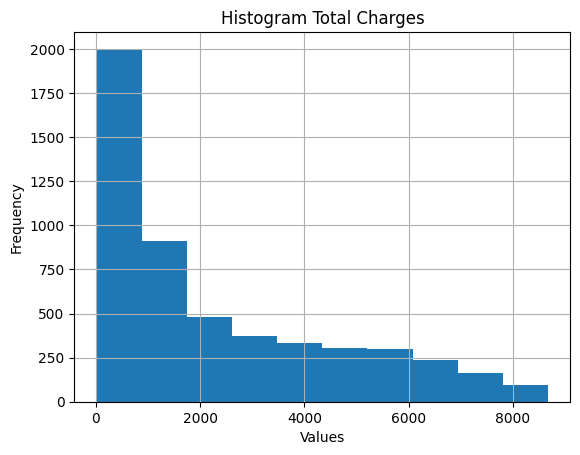

In [397]:
customer_churn['TotalCharges'].dropna().hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Total Charges')
plt.show()

In [398]:
customer_churn['TotalCharges']=customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].median())

/tmp/ipython-input-1321850189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['TotalCharges']=customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].median())


In [399]:
customer_churn.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# outlier handling

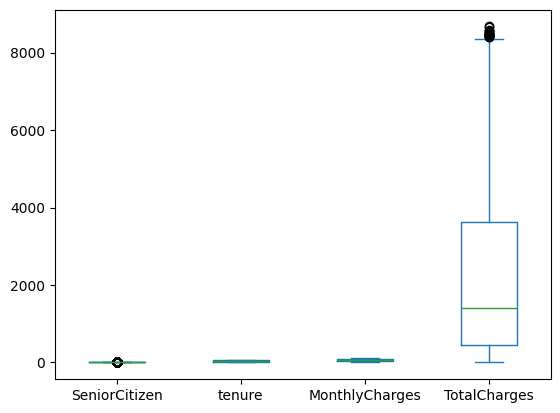

In [400]:
customer_churn.plot(kind='box');


In [401]:
num_cols = customer_churn.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols :
    Q1 = customer_churn[col].quantile(0.25)
    Q3 =customer_churn[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers =customer_churn[(customer_churn[col] < lower) | (customer_churn[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'SeniorCitizen': 877, 'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 17}

<Axes: >

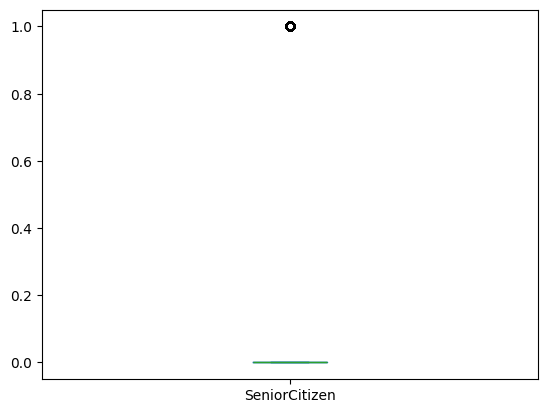

In [452]:
customer_churn[['SeniorCitizen']].plot(kind='box')

<Axes: >

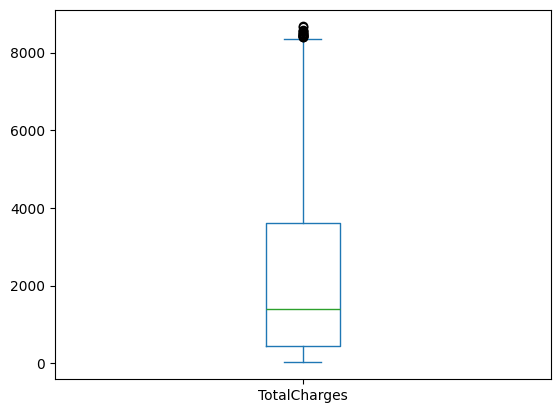

In [402]:
customer_churn[['TotalCharges']].plot(kind='box')

In [403]:
Q1 = customer_churn['TotalCharges'].quantile(0.25)
Q3 = customer_churn['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
customer_churn['TotalCharges'] =customer_churn['TotalCharges'].clip(lower, upper)

/tmp/ipython-input-190083155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['TotalCharges'] =customer_churn['TotalCharges'].clip(lower, upper)


In [404]:
num_cols = customer_churn.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols :
    Q1 = customer_churn[col].quantile(0.25)
    Q3 = customer_churn[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = customer_churn[(customer_churn[col] < lower) | (customer_churn[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'SeniorCitizen': 877, 'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 0}

# Feature Engineering

In [405]:
customer_churn1=customer_churn.select_dtypes(include=['number'])
corr=customer_churn1.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.021622,0.205371,0.102725
tenure,0.021622,1.000000,0.231534,0.797000
MonthlyCharges,0.205371,0.231534,1.000000,0.606818
TotalCharges,0.102725,0.797000,0.606818,1.000000


In [406]:
customer_churn['CustomerLifetimeValue'] = (
    customer_churn['tenure'] *customer_churn['MonthlyCharges'])


/tmp/ipython-input-3903681437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['CustomerLifetimeValue'] = (


In [407]:
customer_churn['LongTermCustomer'] = (
    (customer_churn['tenure'] > 24) &
    (customer_churn['Contract'] != 'Month-to-month')
).astype(int)


/tmp/ipython-input-3924715624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['LongTermCustomer'] = (


In [408]:
customer_churn['AvgMonthlySpend'] = (
    customer_churn['TotalCharges'] / (customer_churn['tenure'] + 1)
)


/tmp/ipython-input-4256060407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['AvgMonthlySpend'] = (


# Encoding

In [409]:
le= LabelEncoder()
customer_churn['Churn']=le.fit_transform(customer_churn['Churn'])
customer_churn

/tmp/ipython-input-1067422016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn['Churn']=le.fit_transform(customer_churn['Churn'])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerLifetimeValue,LongTermCustomer,AvgMonthlySpend
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,...,No internet service,One year,No,Mailed check,20.75,700.450,0,726.25,1,19.456944
1,Female,0,No,No,28,No,No phone service,DSL,No,No,...,No,Month-to-month,Yes,Mailed check,35.75,961.400,0,1001.00,0,33.151724
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,No,Electronic check,98.60,5581.050,0,5521.60,0,97.913158
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.000,0,797.55,1,19.750000
4,Female,0,Yes,Yes,43,No,No phone service,DSL,No,Yes,...,No,One year,Yes,Bank transfer (automatic),51.25,2151.600,0,2203.75,1,48.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,Male,0,No,No,31,Yes,No,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Electronic check,78.45,1400.725,1,2431.95,0,43.772656
5629,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,99.00,5038.150,0,5049.00,0,96.887500
5630,Male,1,Yes,No,68,No,No phone service,DSL,Yes,Yes,...,No,Two year,Yes,Electronic check,41.95,2965.750,0,2852.60,1,42.981884
5631,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.850,0,1436.40,1,18.121233


In [410]:
lab = ['Partner','Dependents','PhoneService','PaperlessBilling']

le = LabelEncoder()

for col in lab:
    customer_churn[col] = le.fit_transform(customer_churn[col])
customer_churn

/tmp/ipython-input-1925876119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn[col] = le.fit_transform(customer_churn[col])
/tmp/ipython-input-1925876119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_churn[col] = le.fit_transform(customer_churn[col])
/tmp/ipython-input-1925876119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerLifetimeValue,LongTermCustomer,AvgMonthlySpend
0,Female,0,0,0,35,1,No,No,No internet service,No internet service,...,No internet service,One year,0,Mailed check,20.75,700.450,0,726.25,1,19.456944
1,Female,0,0,0,28,0,No phone service,DSL,No,No,...,No,Month-to-month,1,Mailed check,35.75,961.400,0,1001.00,0,33.151724
2,Male,0,0,0,56,1,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,0,Electronic check,98.60,5581.050,0,5521.60,0,97.913158
3,Male,0,1,0,39,1,No,No,No internet service,No internet service,...,No internet service,Two year,1,Bank transfer (automatic),20.45,790.000,0,797.55,1,19.750000
4,Female,0,1,1,43,0,No phone service,DSL,No,Yes,...,No,One year,1,Bank transfer (automatic),51.25,2151.600,0,2203.75,1,48.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,Male,0,0,0,31,1,No,Fiber optic,No,Yes,...,No,Month-to-month,1,Electronic check,78.45,1400.725,1,2431.95,0,43.772656
5629,Male,0,0,0,51,1,No,Fiber optic,No,Yes,...,Yes,Month-to-month,1,Electronic check,99.00,5038.150,0,5049.00,0,96.887500
5630,Male,1,1,0,68,0,No phone service,DSL,Yes,Yes,...,No,Two year,1,Electronic check,41.95,2965.750,0,2852.60,1,42.981884
5631,Male,0,1,1,72,1,No,No,No internet service,No internet service,...,No internet service,Two year,0,Bank transfer (automatic),19.95,1322.850,0,1436.40,1,18.121233


In [411]:
one_hot = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies','PaymentMethod']

customer_churn = pd.get_dummies(customer_churn, columns=one_hot, drop_first=True, dtype=int)
customer_churn


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,35,1,One year,0,20.75,700.450,0,...,0,1,0,1,0,1,0,0,0,1
1,0,0,0,28,0,Month-to-month,1,35.75,961.400,0,...,1,0,1,0,0,0,0,0,0,1
2,0,0,0,56,1,Month-to-month,0,98.60,5581.050,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,39,1,Two year,1,20.45,790.000,0,...,0,1,0,1,0,1,0,0,0,0
4,0,1,1,43,0,One year,1,51.25,2151.600,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,0,0,0,31,1,Month-to-month,1,78.45,1400.725,1,...,0,0,1,0,0,0,0,0,1,0
5629,0,0,0,51,1,Month-to-month,1,99.00,5038.150,0,...,1,0,0,0,1,0,1,0,1,0
5630,1,1,0,68,0,Two year,1,41.95,2965.750,0,...,1,0,0,0,0,0,0,0,1,0
5631,0,1,1,72,1,Two year,0,19.95,1322.850,0,...,0,1,0,1,0,1,0,0,0,0


In [412]:

oe=OrdinalEncoder(categories=[['Month-to-month','One year','Two year']],dtype=int)
customer_churn['Contract']=oe.fit_transform(customer_churn[['Contract']])
customer_churn

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,35,1,1,0,20.75,700.450,0,...,0,1,0,1,0,1,0,0,0,1
1,0,0,0,28,0,0,1,35.75,961.400,0,...,1,0,1,0,0,0,0,0,0,1
2,0,0,0,56,1,0,0,98.60,5581.050,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,39,1,2,1,20.45,790.000,0,...,0,1,0,1,0,1,0,0,0,0
4,0,1,1,43,0,1,1,51.25,2151.600,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,0,0,0,31,1,0,1,78.45,1400.725,1,...,0,0,1,0,0,0,0,0,1,0
5629,0,0,0,51,1,0,1,99.00,5038.150,0,...,1,0,0,0,1,0,1,0,1,0
5630,1,1,0,68,0,2,1,41.95,2965.750,0,...,1,0,0,0,0,0,0,0,1,0
5631,0,1,1,72,1,2,0,19.95,1322.850,0,...,0,1,0,1,0,1,0,0,0,0


In [413]:
customer_churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,...,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000,5465.000000
mean,0.160476,0.486734,0.296432,32.695700,0.903202,0.696798,0.595242,65.514492,2244.646757,0.266240,...,0.346020,0.213724,0.292406,0.213724,0.389204,0.213724,0.390485,0.215554,0.334675,0.227630
std,0.367080,0.499870,0.456725,24.646568,0.295709,0.836637,0.490890,29.011422,2218.485242,0.442032,...,0.475743,0.409972,0.454910,0.409972,0.487614,0.409972,0.487904,0.411243,0.471920,0.419341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.850000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,44.050000,449.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,1.000000,70.650000,1400.725000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,89.150000,3617.100000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,118.750000,8368.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scaling

In [414]:
categories = ['tenure','MonthlyCharges','TotalCharges','CustomerLifetimeValue','AvgMonthlySpend']
sscaler = MinMaxScaler()
customer_churn[categories] = sscaler.fit_transform(customer_churn[categories])
customer_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0.486111,1,1,0,0.024876,0.081629,0,...,0,1,0,1,0,1,0,0,0,1
1,0,0,0,0.388889,0,0,1,0.174129,0.112881,0,...,1,0,1,0,0,0,0,0,0,1
2,0,0,0,0.777778,1,0,0,0.799502,0.666136,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,0.541667,1,2,1,0.021891,0.092354,0,...,0,1,0,1,0,1,0,0,0,0
4,0,1,1,0.597222,0,1,1,0.328358,0.255421,0,...,0,0,1,0,1,0,0,0,0,0


## Feature Selection

In [415]:
customer_churn.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
InternetService_Fiber optic,0.310719
PaymentMethod_Electronic check,0.300092
PaperlessBilling,0.189707
MonthlyCharges,0.189614
SeniorCitizen,0.151713
StreamingTV_Yes,0.060038
StreamingMovies_Yes,0.058421
AvgMonthlySpend,0.054545
MultipleLines_Yes,0.041313


# Model Development

split train and test

In [416]:
X=customer_churn.drop(['Churn'],axis=1)
y=customer_churn['Churn']

In [417]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [418]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4372, 32)
(1093, 32)
(4372,)
(1093,)


## 1.logistic regression

In [419]:
#initalizing the ml model
log_reg_model=LogisticRegression()

#training the model
log_pred=log_reg_model.fit(X_train,y_train)

#pred usinng the model and test freatures
y_pred=log_reg_model.predict(X_test)

#Evaluate
acc_log_reg=accuracy_score(y_test,y_pred)
prec_log_reg=precision_score(y_test,y_pred)
rec_log_reg=recall_score(y_test,y_pred)
f1_log_reg=f1_score(y_test,y_pred)


print("the accuracy",acc_log_reg)
print("the precision",prec_log_reg)
print("the recall",rec_log_reg)
print("the f1_score",f1_log_reg)
confusion_matrix(y_test,y_pred)

the accuracy 0.8197621225983531
the precision 0.7232142857142857
the recall 0.5454545454545454
the f1_score 0.6218809980806143


array([[734,  62],
       [135, 162]])

## 2. KNN

In [420]:
acc_list=[]
neighbors_range=np.arange(1,20)

for k in neighbors_range:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)

  #Training the ML model
  classifier.fit(X_train,y_train)

  #predict using the trained Ml model
  y_pred=classifier.predict(X_test)

  #Evaluate  the Ml model
  acc= accuracy_score(y_test,y_pred)

  #populate acc_list with accuracy achieved for each value of 'k'
  acc_list.append(acc)

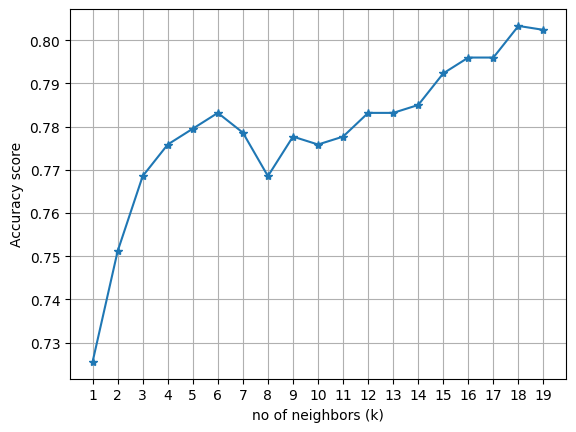

In [421]:
plt.plot(neighbors_range,acc_list,'*-')
plt.xlabel('no of neighbors (k)')
plt.ylabel('Accuracy score')
plt.xticks(neighbors_range)
plt.grid()

In [422]:
#initializing the model
KNN_classifier = KNeighborsClassifier(n_neighbors= 18,metric='euclidean')

#training the model
KNN_classifier.fit(X_train,y_train)

#predict using the trained Ml model
y_pred_knn=KNN_classifier.predict(X_test)

#Evaluate the ML model
Acc_knn=accuracy_score(y_test,y_pred_knn)
pred_knn=precision_score(y_test,y_pred_knn)
Rec_knn=recall_score(y_test,y_pred_knn)
f1_knn=f1_score(y_test,y_pred_knn)

print("the accuracy",Acc_knn)
print("the precision",pred_knn)
print("the recall",Rec_knn)
print("the f1_score",f1_knn)
confusion_matrix(y_test,y_pred_knn)

the accuracy 0.8032936870997255
the precision 0.6798245614035088
the recall 0.5218855218855218
the f1_score 0.5904761904761905


array([[723,  73],
       [142, 155]])

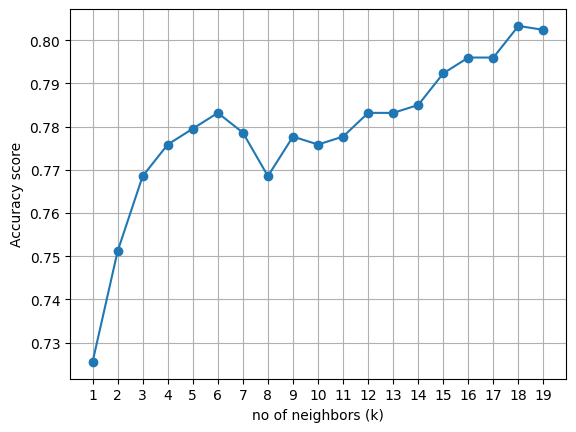

In [423]:
plt.plot(neighbors_range,acc_list,'o-')
plt.xlabel('no of neighbors (k)')
plt.ylabel('Accuracy score')
plt.xticks(neighbors_range)
plt.grid()

## 3. Navie Baye's

In [424]:
#initializing the model
navie_baye_classifier =GaussianNB()

#training the model
navie_baye_classifier.fit(X_train,y_train)

#predict using the trained Ml model
y_pred_nb=navie_baye_classifier.predict(X_test)

#Evaluate the ML model
Acc_nb=accuracy_score(y_test,y_pred_nb)
pred_nb=precision_score(y_test,y_pred_nb)
Rec_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)

print("the accuracy",Acc_nb)
print("the precision",pred_nb)
print("the recall",Rec_nb)
print("the f1_score",f1_nb)
confusion_matrix(y_test,y_pred_nb)

the accuracy 0.7127172918572735
the precision 0.4842300556586271
the recall 0.8787878787878788
the f1_score 0.6244019138755981


array([[518, 278],
       [ 36, 261]])

## 4. Decision Tree

In [425]:
#initializing the model
DT_classifier = DecisionTreeClassifier()

#training the model
DT_classifier.fit(X_train,y_train)

#predict using the trained Ml model
y_pred_dt=DT_classifier.predict(X_test)

#Evaluate the ML model
Acc_dt=accuracy_score(y_test,y_pred_dt)
pred_dt=precision_score(y_test,y_pred_dt)
Rec_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)

print("the accuracy",Acc_dt)
print("the precision",pred_dt)
print("the recall",Rec_dt)
print("the f1_score",f1_dt)
confusion_matrix(y_test,y_pred_dt)

the accuracy 0.7557182067703568
the precision 0.5543478260869565
the recall 0.5151515151515151
the f1_score 0.5340314136125655


array([[673, 123],
       [144, 153]])

## 5. SVM

In [426]:
# initializing the ML model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# training the model
svm_pred = svm_model.fit(X_train, y_train)

# prediction using the model and test features
y_pred = svm_model.predict(X_test)

# evaluation metrics
acc_svm  = accuracy_score(y_test, y_pred)
prec_svm = precision_score(y_test, y_pred)
rec_svm  = recall_score(y_test, y_pred)
f1_svm   = f1_score(y_test, y_pred)

print("the accuracy", acc_svm)
print("the precision", prec_svm)
print("the recall", rec_svm)
print("the f1_score", f1_svm)

the accuracy 0.817932296431839
the precision 0.7333333333333333
the recall 0.5185185185185185
the f1_score 0.6074950690335306


In [427]:
# Model Fine-Tuning
lr = LogisticRegression(max_iter=1000)

In [428]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,scoring='roc_auc',n_jobs=-1)

grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

print("Best Parameters:", grid_lr.best_params_)
print("Best CV ROC-AUC:", grid_lr.best_score_)

y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.838760697355663

Test Accuracy: 0.8206770356816102
Test ROC-AUC: 0.8744078134781651

Confusion Matrix:
 [[735  61]
 [135 162]]


### Feature selection

In [429]:
rf = RandomForestClassifier(n_estimators=200,random_state=55)
rf.fit(X, y)

# Feature importance ranking
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
9,CustomerLifetimeValue,0.123042
8,TotalCharges,0.116672
3,tenure,0.115020
11,AvgMonthlySpend,0.112395
7,MonthlyCharges,0.110005
5,Contract,0.053146
10,LongTermCustomer,0.040936
15,InternetService_Fiber optic,0.034804
30,PaymentMethod_Electronic check,0.027331
12,gender_Male,0.020694


In [430]:
top_features = feature_importance['Feature'].head(20).tolist()

X_train_new= X_train[top_features]
X_test_new = X_test[top_features]

In [431]:
lr = LogisticRegression(max_iter=1000)

In [432]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}
grid_lr = GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,scoring='roc_auc',n_jobs=-1)
grid_lr.fit(X_train_new, y_train)
best_lrr = grid_lr.best_estimator_

print("Best Parameters:", grid_lr.best_params_)
print("Best CV ROC-AUC:", grid_lr.best_score_)

y_pred_lr = best_lrr.predict(X_test_new)
y_prob_lr = best_lrr.predict_proba(X_test_new)[:, 1]

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

prec_log_reg=precision_score(y_test,y_pred_lr)
rec_log_reg=recall_score(y_test,y_pred_lr)
f1_log_reg=f1_score(y_test,y_pred_lr)

print("the precision",prec_log_reg)
print("the recall",rec_log_reg)
print("the f1_score",f1_log_reg)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.8354545410663718

Test Accuracy: 0.8087831655992681
Test ROC-AUC: 0.8648059320169873
the precision 0.7075471698113207
the recall 0.5050505050505051
the f1_score 0.5893909626719057

Confusion Matrix:
 [[734  62]
 [147 150]]


# Test data

In [433]:
customer_test=pd.read_csv("/content/Testing_data.csv")
customer_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


In [434]:
customer_test=customer_test.drop("customerID",axis=1)

In [435]:
customer_test.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## Feature Engineering

In [436]:


customer_test['CustomerLifetimeValue'] = (
    customer_test['tenure'] * customer_test['MonthlyCharges']
)


In [437]:

customer_test['LongTermCustomer'] = (
    (customer_test['tenure'] > 24) &
    (customer_test['Contract'] != 'Month-to-month')
).astype(int)

In [438]:
customer_test['TotalCharges'] = pd.to_numeric(
    customer_test['TotalCharges'], errors='coerce'
)

In [439]:
customer_test['TotalCharges']=customer_test['TotalCharges'].fillna(customer_test['TotalCharges'].median())

In [440]:
customer_test['AvgMonthlySpend'] = (
    customer_test['TotalCharges'] / (customer_test['tenure'] + 1)
)


In [441]:
customer_test.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## Encoding

In [442]:
le= LabelEncoder()
customer_test['Churn']=le.fit_transform(customer_test['Churn'])
customer_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerLifetimeValue,LongTermCustomer,AvgMonthlySpend
0,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,81.20,3292.30,0,3248.00,0,80.300000
1,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,No,...,Yes,One year,No,Electronic check,78.85,876.75,0,946.20,0,67.442308
2,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,...,Yes,One year,Yes,Electronic check,100.00,4211.55,1,4300.00,1,95.717045
3,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Two year,Yes,Electronic check,118.20,8547.15,0,8510.40,1,117.084247
4,Female,0,No,No,10,No,No phone service,DSL,No,Yes,...,No,Month-to-month,No,Electronic check,36.25,374.00,0,362.50,0,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Male,0,No,No,27,Yes,No,DSL,Yes,Yes,...,No,One year,No,Bank transfer (automatic),55.45,1477.65,0,1497.15,1,52.773214
1405,Female,1,No,No,2,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,75.45,158.40,1,150.90,0,52.800000
1406,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,1,225.45,0,54.187500
1407,Male,0,Yes,Yes,53,Yes,No,No,No internet service,No internet service,...,No internet service,One year,No,Credit card (automatic),20.20,1068.15,0,1070.60,1,19.780556


In [443]:
lab = ['Partner','Dependents','PhoneService','PaperlessBilling']

le = LabelEncoder()

for col in lab:
    customer_test[col] = le.fit_transform(customer_test[col])

In [444]:
one_hot = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies','PaymentMethod']

customer_test = pd.get_dummies(customer_test, columns=one_hot, drop_first=True, dtype=int)

In [445]:
oe=OrdinalEncoder(categories=[['Month-to-month','One year','Two year']],dtype=int)
customer_test['Contract']=oe.fit_transform(customer_test[['Contract']])
customer_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,40,1,0,1,81.20,3292.30,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,12,1,1,0,78.85,876.75,0,...,1,0,0,0,1,0,1,0,1,0
2,0,0,0,43,1,1,1,100.00,4211.55,1,...,0,0,1,0,1,0,1,0,1,0
3,0,0,0,72,1,2,1,118.20,8547.15,0,...,1,0,1,0,1,0,1,0,1,0
4,0,0,0,10,0,0,0,36.25,374.00,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,27,1,1,0,55.45,1477.65,0,...,0,0,0,0,0,0,0,0,0,0
1405,1,0,0,2,1,0,1,75.45,158.40,1,...,0,0,0,0,0,0,0,0,0,1
1406,0,1,0,3,1,0,1,75.15,216.75,1,...,0,0,0,0,0,0,0,1,0,0
1407,0,1,1,53,1,1,0,20.20,1068.15,0,...,0,1,0,1,0,1,0,1,0,0


## Scaling

In [446]:
categories = ['tenure','MonthlyCharges','TotalCharges','CustomerLifetimeValue','AvgMonthlySpend']
sscaler = MinMaxScaler()
customer_test[categories] = sscaler.fit_transform(customer_test[categories])
customer_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0.555556,1,0,1,0.625626,0.383837,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0.166667,1,1,0,0.602102,0.100600,0,...,1,0,0,0,1,0,1,0,1,0
2,0,0,0,0.597222,1,1,1,0.813814,0.491625,1,...,0,0,1,0,1,0,1,0,1,0
3,0,0,0,1.000000,1,2,1,0.995996,1.000000,0,...,1,0,1,0,1,0,1,0,1,0
4,0,0,0,0.138889,0,0,0,0.175676,0.041649,0,...,0,0,1,0,0,0,0,0,1,0


#Accuracy

In [447]:
#best Accuracy is Logistic Regression

X_test=customer_test.drop('Churn',axis=1)
y_test=customer_test['Churn']

In [448]:
y_pred =log_reg_model.predict(X_test)


In [449]:
X_test.isnull().sum().sort_values(ascending=False)


,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
Contract,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
CustomerLifetimeValue,0


In [450]:

rec_svm = precision_score(y_test, y_pred)
rec_svm  = recall_score(y_test, y_pred)
f1_svm   = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("the precision", prec_svm)
print("the recall", rec_svm)
print("the f1_score", f1_svm)

print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8126330731014905
the precision 0.7333333333333333
the recall 0.5342465753424658
the f1_score 0.5963302752293578
[[950  94]
 [170 195]]


In [451]:
y_pred_lr_predict = best_lr.predict(X_test)
rec_svm = precision_score(y_test, y_pred_lr_predict)
rec_svm  = recall_score(y_test, y_pred_lr_predict)
f1_svm   = f1_score(y_test, y_pred_lr_predict)

print("Accuracy:", accuracy_score(y_test, y_pred_lr_predict))
print("the precision", prec_svm)
print("the recall", rec_svm)
print("the f1_score", f1_svm)
print(confusion_matrix(y_test, y_pred_lr_predict))

Accuracy: 0.815471965933286
the precision 0.7333333333333333
the recall 0.5424657534246575
the f1_score 0.6036585365853658
[[951  93]
 [167 198]]
